In [88]:
import pandas as pd
import json
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Part3

In [22]:
def json_to_df(filename):
    data = json.load(open(filename, 'r'))
    columns = defaultdict(list)
    for entry in data:
        for col in entry:
            columns[col].append(entry[col])
    df = pd.DataFrame(columns)
    return df

In [152]:
filename = 'ultimate_data_challenge.json'
df = json_to_df(filename)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [180]:
dfdummy = pd.get_dummies(df.drop(['last_trip_date','signup_date'],axis=1))
dfdummy.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,1,1,0


In [154]:
df['last_trip_date'].max(),df['last_trip_date'].min()

('2014-07-01', '2014-01-01')

In [155]:
active = df['last_trip_date'].apply(lambda x: x > '2014-06-01')

In [156]:
active.sum(),active.sum()/df.shape[0]

(18310, 0.3662)

In [157]:
from xgboost import XGBClassifier

In [158]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test = train_test_split(dfdummy,active, test_size = 0.3)

In [189]:
clf = XGBClassifier(max_depth=5)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [183]:
clf.score(X_train, y_train)

0.7941428571428572

In [184]:
clf.score(X_test,y_test)

0.7869333333333334

In [185]:
y_pred = clf.predict(X_test)

In [176]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [191]:
c = confusion_matrix(y_test, y_pred)
c

array([[8190, 1297],
       [1899, 3614]])

In [192]:
TN = c[0][0]
TP = c[1][1]
FP = c[1][0]
FN = c[0][1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)

f1 = 2*precision*recall/(precision+recall)
f1

0.6933998465080583

In [187]:
f1_score(y_test,y_pred)

0.6933998465080583

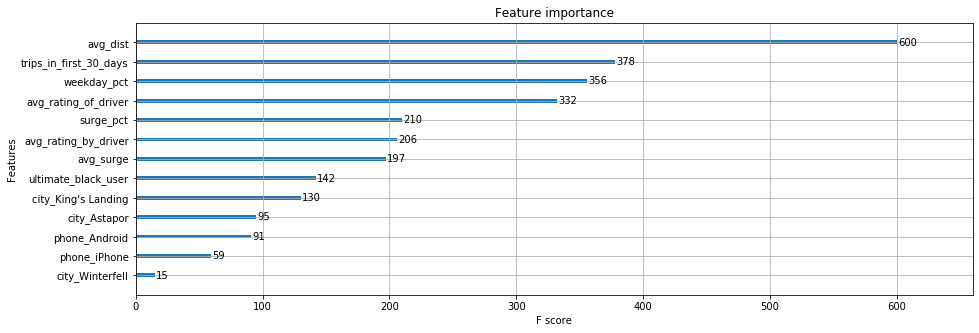

In [190]:
from xgboost import plot_importance
fig,ax = plt.subplots(1,1,figsize=(15,5))
plot_importance(clf,ax=ax)

# Part2

In [66]:
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [67]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [68]:
login['count'] = [1 for i in range(login.shape[0])]
login.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [82]:
time = login.set_index('login_time')
time.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [83]:
time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


Text(0, 0.5, 'count')

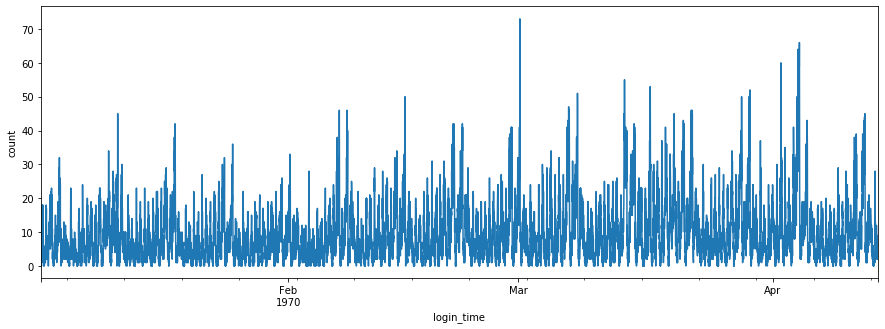

In [99]:
counts = time['count'].resample('15min').sum()

_ = plt.figure(figsize = (15,5))
_ = counts.plot()
plt.ylabel('count')

(1450, 7200)

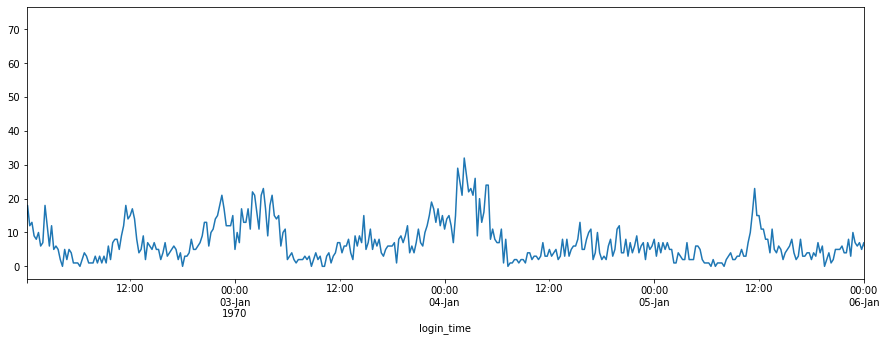

In [112]:
_ = plt.figure(figsize = (15,5))
counts.plot()

plt.xlim(['1970-01-02 00:10','1970-01-06 00:00'])

(1440, 27360)

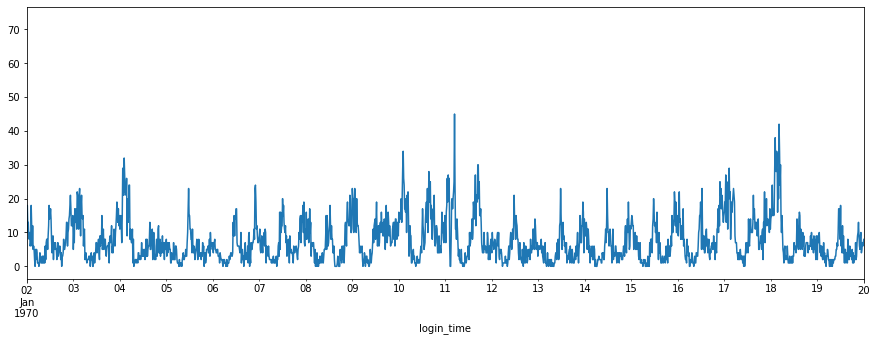

In [110]:
_ = plt.figure(figsize = (15,5))
counts.plot()
plt.xlim(['1970-01-02','1970-01-20'])